In [24]:
import serial
import numpy as np
import struct
import matplotlib.pyplot as plt
import pandas as pd
serial.PARITY_NONE

'N'

In [25]:
def send_data(data):
    with serial.Serial("COM6", 9600) as ser:
        ser.write(data)
def load_np(target_name, index = 0):
    file_name = './model_param/' + target_name + '.npy'
    with open(file_name, 'rb') as f:
        array = np.load(f)
        return array
def float_to_barray(value):
    ba = bytearray(struct.pack("f", value))
    ba.reverse()
    return ba
def float_list_to_barray(flist):
    return [float_to_barray(x) for x in flist]

In [36]:
x_i = [0]
x_f  = [float_to_barray(x) for x in x_i]

In [37]:
for i in x_f:
    print([ "0x%02x" % b for b in i ])
    #send_data(i)

['0x40', '0xa0', '0x00', '0x00']
['0x40', '0xa0', '0x00', '0x00']


In [96]:
test_num = float_to_barray(1)
test_num2 = float_to_barray(2)
test_num3 = float_to_barray(3)
test_num4 = float_to_barray(4)
print([ "0x%02x" % b for b in test_num ])
send_data(test_num)

['0x3f', '0x80', '0x00', '0x00']


In [97]:
val  = 9
valb = val.to_bytes(1, 'big')
send_data(valb)

In [98]:
test_image = load_np('test_image')
w1         = load_np('w1')
b1         = load_np('b1')
w2         = load_np('w2')
b2         = load_np('b2')

In [116]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions
def forward_prop(w1, b1, w2, b2, X):
    z1=w1.dot(X)+b1
    a1=ReLU(z1)
    z2=w2.dot(a1)+b2
    a2=softmax(z2)
    return z1, a1, z2, a2
def get_predictions(a2):
    return np.argmax(a2,0)
def ReLU(Z):
    return np.maximum(Z, 0)
def softmax(Z):
    A=np.exp(Z) / sum(np.exp(Z))
    return A
#If anyone is reading this comment, opening a file by this method is a bad practice. use with open('filename'): method
def format_file (file_name):
    target_file_name = file_name[:-7] + ".txt"
    f = open(file_name, "r")
    t = open(target_file_name, "w")
    t.write("{")
    lines = []
    for line in f:
        lines.append(line.rstrip())
    size = len(lines)
    if (size == 1):
        t.write(lines[0])
    else:
        for i in range(size):
            if (i != size-1):
                t.write("{" + lines[i] +"},")
            else:
                t.write("{" + lines[i] +"}")
    
    t.write("}")
    f.close()
    t.close()

In [117]:
data=pd.read_csv(r"C:\Users\erincutku\Desktop\projeler\mnist_nn\mnist_train.csv",header=None)
data=np.array(data)
m, n= data.shape
#np.random.shuffle(data)

data_dev=data[0:1000].T
Y_dev=data_dev[0]
X_dev=data_dev[1:n]
X_dev = X_dev / 255.

data_train=data[1000:m].T
Y_train=data_train[0]
X_train=data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

Prediction:  [2]
Label:  2


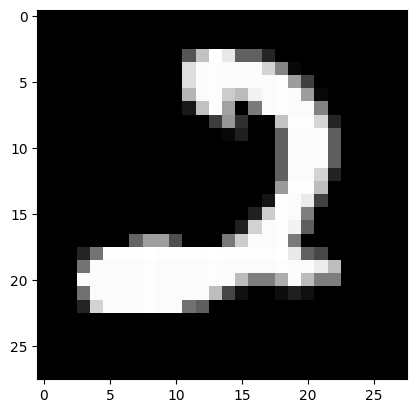

In [124]:
index = 10
test_prediction(index, w1, b1, w2, b2)
test_img = X_train[:, index, None]
z1, a1, z2, a2 =forward_prop(w1, b1, w2, b2, test_img)
a1_f32 = a1.astype(np.float32)
a1_list = a1.T.tolist()[0] #spagetti code for unit conversion :(

In [125]:
a1_uart_data = float_list_to_barray(a1_list)
for i in a1_uart_data:
    #print([ "0x%02x" % b for b in i ])
    send_data(i)

In [23]:
np.savetxt('./model_param/a1_np.txt', a1.T, delimiter=',', fmt='%.17f')
format_file("./model_param/a1_np.txt")
a1

array([[0.        ],
       [0.6341306 ],
       [1.01006462],
       [0.        ],
       [0.53889853],
       [1.43758739],
       [1.0527221 ],
       [7.64553711],
       [0.        ],
       [0.        ]])